# Proyecto Sistema de recomendacion de Spotify
## Universidad del Valle de Guatemala
### Curso: Data Science
#### Integrantes del grupo:
1. Javier Mombiela
2. Jose Hernandez
3. Jun Woo
4. Andres de la Roca
5. Pablo Gonzalez
   

### Imports del proyecto

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Load de la data

In [17]:
with open('./data/challenge_set.json', 'r') as file:
    data = json.load(file)

# Crear un DataFrame a partir de la lista de playlists dentro del diccionario
df = pd.DataFrame(data['playlists'])

### Transformaciones

Volver la seccion de playlist en una lista de listas

In [21]:
for index, row in df.iterrows():
    tracks = row['tracks']
    track_list = []
    for track in tracks:
        track_list.append([
            track['pos'],
            track['artist_name'],
            track['track_uri'],
            track['artist_uri'],
            track['track_name'],
            track['album_uri'],
            track['duration_ms'],
            track['album_name']
        ])
    df.at[index, 'tracks'] = track_list

### Visualizar estructrura de la data

In [22]:
filas_5000_5003 = df.iloc[5000:5004]
print(filas_5000_5003)

               name  num_holdouts      pid  num_tracks                                             tracks  num_samples
5000         Oldies           111  1000001         136  [[0, Maze, spotify:track:3kpM8OxeMaaAWI9pErdj1...           25
5001    Study Music           104  1000009         129  [[0, Adele, spotify:track:7rPLZ8Krm6CZIbraFUln...           25
5002  Music i like.           139  1000029         164  [[0, Twenty One Pilots, spotify:track:3CRDbSIZ...           25
5003         Disney           147  1000045         172  [[0, Carmen Twillie, spotify:track:0HU5JnVaKNT...           25


### Descripcion del dataframe

In [23]:
num_observaciones, num_variables = df.shape
print(f'Número de observaciones: {num_observaciones}')
print(f'Número de variables: {num_variables}')

# Para obtener el tipo de cada variable:
tipos_de_variables = df.dtypes
print('Tipos de variables:')
print(tipos_de_variables)

Número de observaciones: 10000
Número de variables: 6
Tipos de variables:
name            object
num_holdouts     int64
pid              int64
num_tracks       int64
tracks          object
num_samples      int64
dtype: object


In [24]:
df.describe

<bound method NDFrame.describe of                   name  num_holdouts      pid  num_tracks                                             tracks  num_samples
0     spanish playlist            11  1000002          11                                                 []            0
1              Groovin            48  1000003          48                                                 []            0
2               uplift            40  1000004          40                                                 []            0
3                 WUBZ            27  1000006          27                                                 []            0
4                  new            41  1000007          41                                                 []            0
...                ...           ...      ...         ...                                                ...          ...
9995     Playlist 2015            20  1006767          21  [[0, El Gran Combo De Puerto Rico, spotify:tra...    

### Tipos de datos de las variables de track

In [25]:
# Obtener los tipos de datos de las variables dentro de la columna 'tracks'
tipos_de_datos_tracks = df['tracks'].apply(lambda x: pd.Series(x[0] if x else {})).dtypes
datos_nombres = ['pos', 'artist_name', 'track_uri', 'artist_uri', 'track_name', 'album_uri', 'duration_ms', 'album_name']

# Mostrar los tipos de datos
print('Tipos de datos dentro de la columna "tracks":')
for i in range(len(tipos_de_datos_tracks)):
    print(f'{datos_nombres[i]}: {tipos_de_datos_tracks[i]}')



C:\Users\pablo\AppData\Local\Temp\ipykernel_24988\2774670458.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tipos_de_datos_tracks = df['tracks'].apply(lambda x: pd.Series(x[0] if x else {})).dtypes
C:\Users\pablo\AppData\Local\Temp\ipykernel_24988\2774670458.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tipos_de_datos_tracks = df['tracks'].apply(lambda x: pd.Series(x[0] if x else {})).dtypes
C:\Users\pablo\AppData\Local\Temp\ipykernel_24988\2774670458.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tipos_de_datos_tracks = df['tracks'].apply(lambda x: pd.Series(x[0] if x else {})).dtypes
C:\Users\pablo\AppData\Local\Temp\ipyker

Tipos de datos dentro de la columna "tracks":
pos: float64
artist_name: object
track_uri: object
artist_uri: object
track_name: object
album_uri: object
duration_ms: float64
album_name: object


### Resumen de variables numericas y categoricas

In [26]:
# Exploding the 'tracks' column
exploded_df = df.explode('tracks')

# Extracting the track details into separate columns
tracks_df = exploded_df['tracks'].apply(pd.Series)

# Concatenate the exploded_df (without the 'tracks' column) with the new track details
finalTracks_df = pd.concat([exploded_df.drop('tracks', axis=1), tracks_df], axis=1)

# Variable names based on the structure inside 'tracks'
column_names = {
    0: 'position',
    1: 'artist_name',
    2: 'track_uri',
    3: 'artist_uri',
    4: 'track_name',
    5: 'album_uri',
    6: 'duration_ms',
    7: 'album_name'
}

# Rename the columns
finalTracks_df.rename(columns=column_names, inplace=True)


In [27]:
# Summary statistics for numerical variables
numerical_columns1 = ['num_holdouts', 'num_tracks', 'num_samples']
numerical_columns2 = ['duration_ms']
numerical_summary1 = df[numerical_columns1].describe().transpose()
numerical_summary2 = finalTracks_df[numerical_columns2].describe().transpose()
pd.set_option('display.width', 1000)
print(pd.concat([numerical_summary1, numerical_summary2]))


                 count           mean           std   min       25%       50%       75%        max
num_holdouts   10000.0      69.916600     42.385435   5.0      37.0      62.0      90.0      225.0
num_tracks     10000.0      98.016600     66.001737  10.0      44.0      76.0     157.0      250.0
num_samples    10000.0      28.100000     36.886665   0.0       5.0      10.0      25.0      100.0
duration_ms   281000.0  232601.692505  63151.588982   0.0  200026.0  224574.0  256013.0  9158194.0


In [28]:
# Creating frequency tables
name_df = df
name_df['name'] = name_df['name'].str.lower()

finalTracks_df['artist_name'] = finalTracks_df['artist_name'].str.lower()
finalTracks_df['track_name'] = finalTracks_df['track_name'].str.lower()
finalTracks_df['album_name'] = finalTracks_df['album_name'].str.lower()

name_freq = name_df['name'].value_counts().head(20).reset_index()
artist_name_freq = finalTracks_df['artist_name'].value_counts().head(20).reset_index()
track_name_freq = finalTracks_df['track_name'].value_counts().head(20).reset_index()
album_name_freq = finalTracks_df['album_name'].value_counts().head(20).reset_index()

separator = pd.DataFrame({"": ["      |      "] * 20})

combined_df = pd.concat([name_freq, separator, artist_name_freq, separator.copy(), track_name_freq, separator.copy(), album_name_freq], axis=1)

combined_df.columns = ['Playlist Name', 'Frequency', '', 'Artist Name', 'Frequency', '', 'Track Name', 'Frequency', '', 'Album Name', 'Frequency']

print(combined_df)


   Playlist Name  Frequency                          Artist Name  Frequency                                              Track Name  Frequency                                           Album Name  Frequency
0        country        148        |                       drake       4877        |                                         closer        335        |                                       views       1126
1            rap        110        |                  kanye west       2592        |                                          roses        241        |                               coloring book        806
2        workout         87        |              kendrick lamar       1902        |                                           ride        229        |                                      stoney        762
3         oldies         83        |                     rihanna       1734        |                    broccoli (feat. lil yachty)        226        |                     

### Forma del dataset

In [12]:
df.shape

(10000, 6)

### Analisis de valores faltantes y eliminacion de los mismos

In [29]:
empty_track_indices = []
for idx, row in df.iterrows():
    if len(row['tracks']) == 0:
        empty_track_indices.append(idx)

# Mostrar el número de listas de tracks vacías
num_empty_tracks = len(empty_track_indices)
print(f"Número de listas de tracks vacías: {num_empty_tracks}")

# Eliminar las filas con listas de tracks vacías
df = df.drop(empty_track_indices)

Número de listas de tracks vacías: 1000


### Estadisticas vacias en el dataset

In [14]:
known_ids = set()
unique_tracks = set()
unique_albums = set()
unique_artists = set()
total_tracks = 0
playlist_vacias = 0
for playlist in df["tracks"]:
    for track in playlist:
        total_tracks += 1
        known_ids.add(track[2])
        unique_tracks.add(track[4])
        unique_albums.add(track[6])
        unique_artists.add(track[1])

print("total playlists:", len(df))
print("total tracks:   ", total_tracks)
print("unique tracks:  ", len(unique_tracks))
print("unique albums:  ", len(unique_albums))
print("unique artists: ", len(unique_artists))
print()

total playlists: 9000
total tracks:    281000
unique tracks:   53954
unique albums:   32264
unique artists:  14040



### Diagrama de caja y bigotes para la variable de duration_ms

Mediana (Q2): 0.75
Cuartil 1 (Q1): 0.75
Cuartil 3 (Q3): 1.25


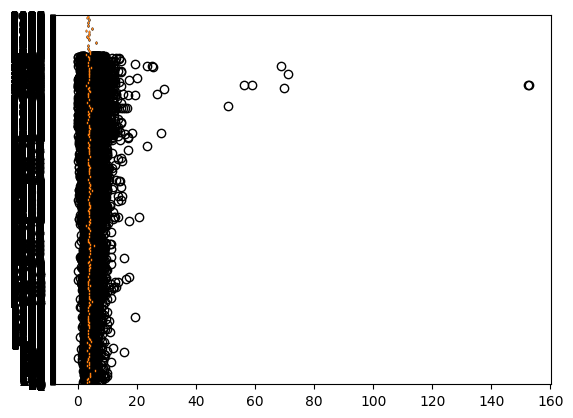

In [13]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
duracion_minutos = df['tracks'].apply(lambda x: [track[6] / (1000 * 60) for track in x])  # Convierte ms a minutos

# Convierte la columna de duraciones a una lista de valores
duracion_minutos = duracion_minutos.tolist()

# Crea la gráfica de caja y bigotes y guarda los valores calculados
boxplot_values = plt.boxplot(duracion_minutos, vert=False)

# Accede a los valores del boxplot
median = boxplot_values['medians'][0].get_data()[1][0]  # Mediana (Q2)
q1 = boxplot_values['boxes'][0].get_data()[1][0]  # Cuartil 1 (Q1)
q3 = boxplot_values['boxes'][0].get_data()[1][2]  # Cuartil 3 (Q3)
outliers = [flier.get_data()[1] for flier in boxplot_values['fliers']]  # Valores atípicos

# Imprime los valores
print("Mediana (Q2):", median)
print("Cuartil 1 (Q1):", q1)
print("Cuartil 3 (Q3):", q3)


### Diagrama de dispersion

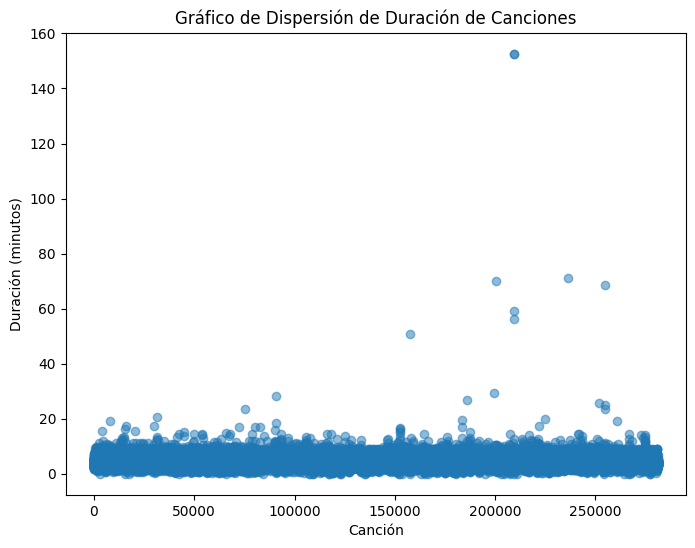

In [14]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
duracion_minutos = df['tracks'].apply(lambda x: [track[6] / (1000 * 60) for track in x])  # Convierte ms a minutos

# Aplana la lista de listas para obtener una lista unidimensional
duracion_minutos_flat = [item for sublist in duracion_minutos for item in sublist]

# Crea un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(range(len(duracion_minutos_flat)), duracion_minutos_flat, alpha=0.5)
plt.xlabel('Canción')
plt.ylabel('Duración (minutos)')
plt.title('Gráfico de Dispersión de Duración de Canciones')
plt.show()

### Diagrama de caja y bigotes para num_samples

Mediana (Q2): 0.925
Cuartil 1 (Q1): 0.925
Cuartil 3 (Q3): 1.075


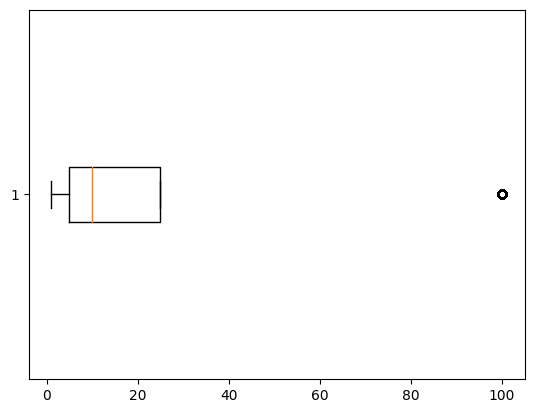

In [15]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
num_samples = df['num_samples'] # Convierte ms a minutos

# Convierte la columna de duraciones a una lista de valores
num_samples = num_samples.tolist()

# Crea la gráfica de caja y bigotes y guarda los valores calculados
boxplot_values = plt.boxplot(num_samples, vert=False)

# Accede a los valores del boxplot
median = boxplot_values['medians'][0].get_data()[1][0]  # Mediana (Q2)
q1 = boxplot_values['boxes'][0].get_data()[1][0]  # Cuartil 1 (Q1)
q3 = boxplot_values['boxes'][0].get_data()[1][2]  # Cuartil 3 (Q3)

# Imprime los valores
print("Mediana (Q2):", median)
print("Cuartil 1 (Q1):", q1)
print("Cuartil 3 (Q3):", q3)


### Diagrama de dispersion para num_samples

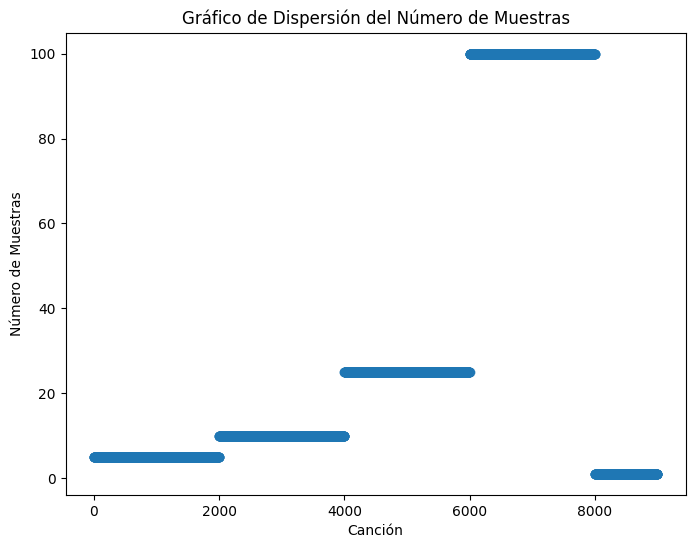

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(num_samples)), num_samples, alpha=0.5)
plt.xlabel('Canción')
plt.ylabel('Número de Muestras')
plt.title('Gráfico de Dispersión del Número de Muestras')
plt.show()

### Diagrama de caja y bigotes para num_tracks

Mediana (Q2): 0.925
Cuartil 1 (Q1): 0.925
Cuartil 3 (Q3): 1.075


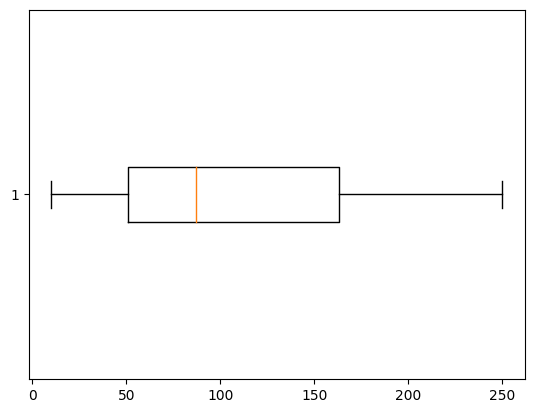

In [17]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
num_tracks = df['num_tracks'] # Convierte ms a minutos

# Convierte la columna de duraciones a una lista de valores
num_tracks = num_tracks.tolist()

# Crea la gráfica de caja y bigotes y guarda los valores calculados
boxplot_values = plt.boxplot(num_tracks, vert=False)

# Accede a los valores del boxplot
median = boxplot_values['medians'][0].get_data()[1][0]  # Mediana (Q2)
q1 = boxplot_values['boxes'][0].get_data()[1][0]  # Cuartil 1 (Q1)
q3 = boxplot_values['boxes'][0].get_data()[1][2]  # Cuartil 3 (Q3)

# Imprime los valores
print("Mediana (Q2):", median)
print("Cuartil 1 (Q1):", q1)
print("Cuartil 3 (Q3):", q3)

### Diagrama de dispersion para num_tracks


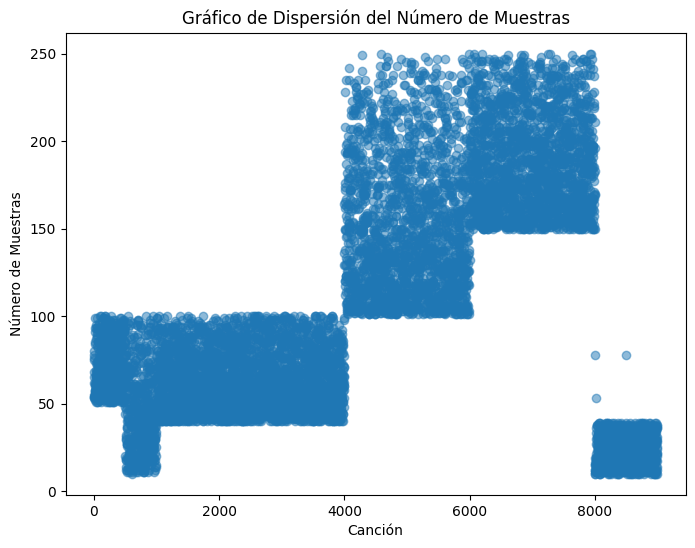

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(num_tracks)), num_tracks, alpha=0.5)
plt.xlabel('Canción')
plt.ylabel('Número de Muestras')
plt.title('Gráfico de Dispersión del Número de Muestras')
plt.show()

### Top 10 artistas con mas canciones en el dataset

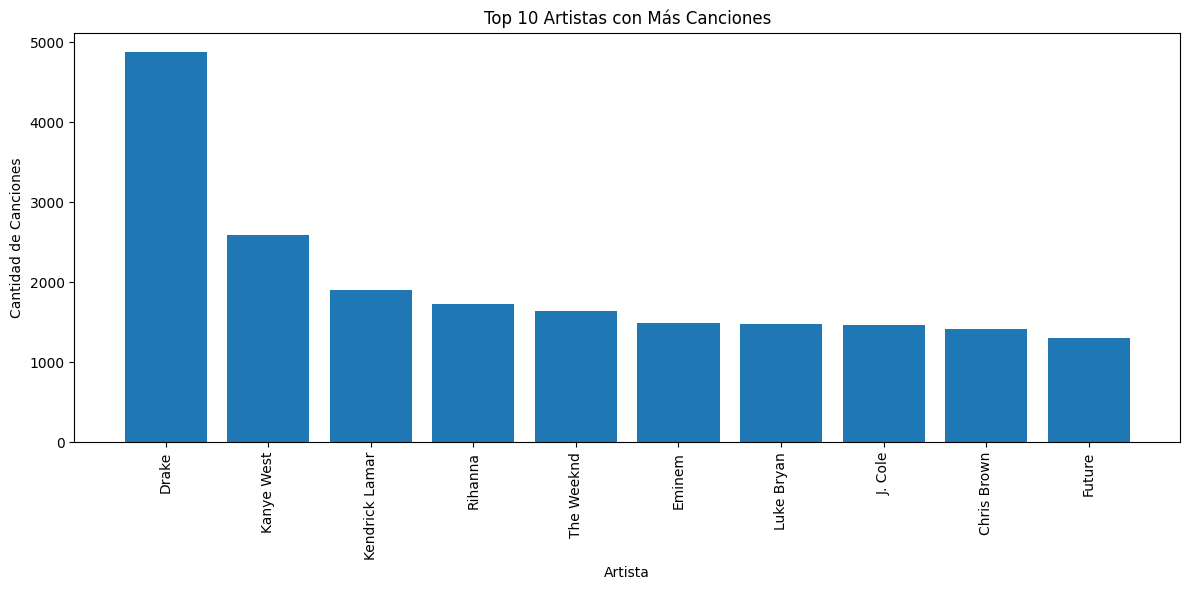

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Creamos un diccionario para contar la cantidad de canciones por artista
artist_counts = {}

# Iteramos sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        artist_name = track_info[1]  # El nombre del artista está en la posición 1
        if artist_name in artist_counts:
            artist_counts[artist_name] += 1
        else:
            artist_counts[artist_name] = 1

# Convertimos el diccionario en un DataFrame para facilitar la visualización
artist_counts_df = pd.DataFrame(list(artist_counts.items()), columns=['Artista', 'Cantidad de Canciones'])

# Ordenamos el DataFrame por la cantidad de canciones en orden descendente
artist_counts_df = artist_counts_df.sort_values(by='Cantidad de Canciones', ascending=False)

# Seleccionamos los 10 artistas principales
top_10_artists = artist_counts_df.head(10)

# Ahora, puedes crear la gráfica de barras solo para los 10 artistas principales
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists['Artista'], top_10_artists['Cantidad de Canciones'])
plt.xlabel('Artista')
plt.ylabel('Cantidad de Canciones')
plt.title('Top 10 Artistas con Más Canciones')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


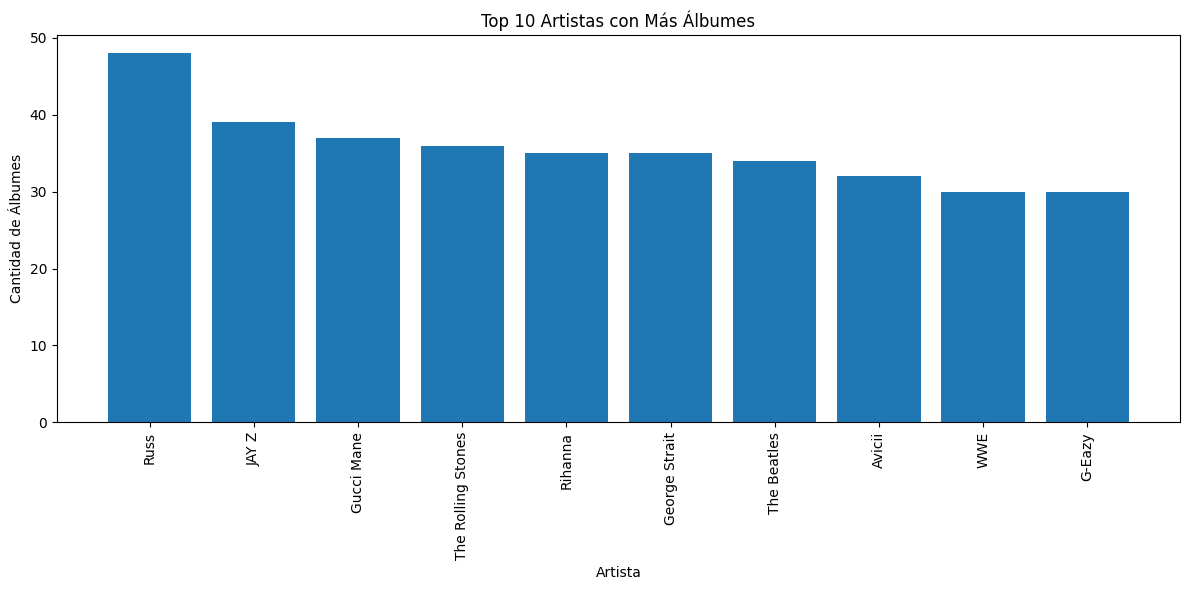

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Creamos un diccionario para contar la cantidad de álbumes por artista
artist_album_counts = {}

# Iteramos sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        artist_name = track_info[1]  # El nombre del artista está en la posición 1
        album_name = track_info[5]   # El nombre del álbum está en la posición 5
        if artist_name in artist_album_counts:
            artist_album_counts[artist_name].add(album_name)
        else:
            artist_album_counts[artist_name] = {album_name}

# Convertimos el diccionario en un DataFrame para facilitar la visualización
artist_album_counts_df = pd.DataFrame({
    'Artista': list(artist_album_counts.keys()),
    'Cantidad de Álbumes': [len(albums) for albums in artist_album_counts.values()]
})

# Ordenamos el DataFrame por la cantidad de álbumes en orden descendente
artist_album_counts_df = artist_album_counts_df.sort_values(by='Cantidad de Álbumes', ascending=False)

# Seleccionamos los 10 artistas con más álbumes
top_10_artists_albums = artist_album_counts_df.head(10)

# Ahora, puedes crear la gráfica de barras para los 10 artistas con más álbumes
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_albums['Artista'], top_10_artists_albums['Cantidad de Álbumes'])
plt.xlabel('Artista')
plt.ylabel('Cantidad de Álbumes')
plt.title('Top 10 Artistas con Más Álbumes')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


### Top 10 canciones que mas se repita en el dataset

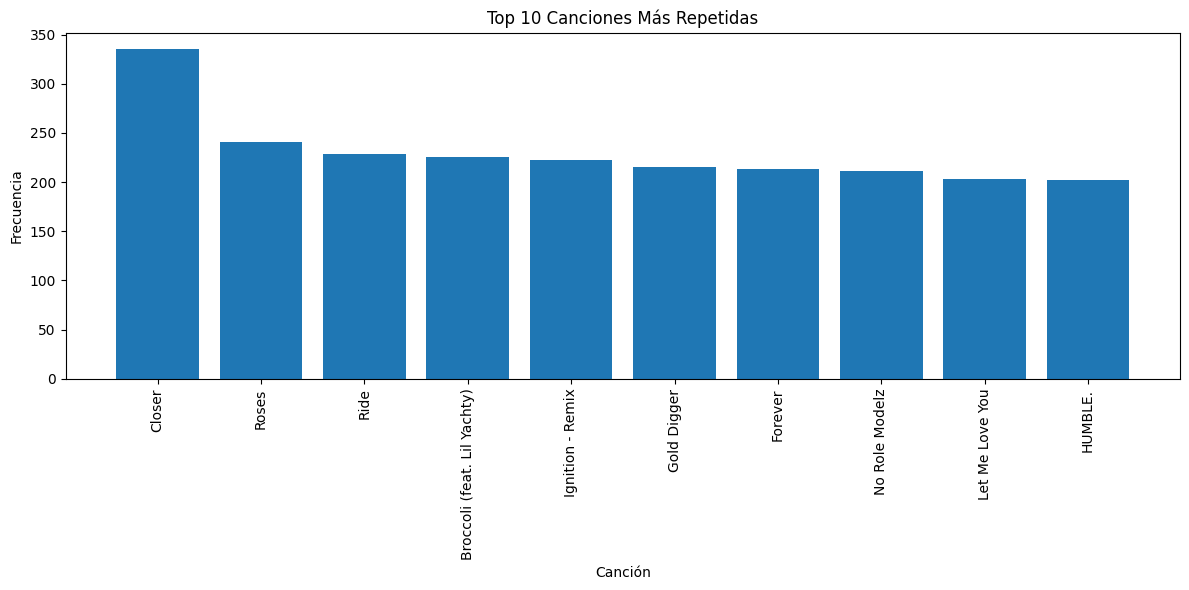

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Crear un diccionario para contar la frecuencia de cada canción
song_counts = {}

# Iterar sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        song_name = track_info[4]  # El nombre del álbum está en la posición 4
        if song_name in song_counts:
            song_counts[song_name] += 1
        else:
            song_counts[song_name] = 1

# Convertir el diccionario en un DataFrame para facilitar la visualización
song_counts_df = pd.DataFrame(list(song_counts.items()), columns=['Canción', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia en orden descendente
song_counts_df = song_counts_df.sort_values(by='Frecuencia', ascending=False)

# Seleccionar las 10 canciones más repetidas
top_10_songs = song_counts_df.head(10)

# Crear la gráfica de barras para las 10 canciones más repetidas
plt.figure(figsize=(12, 6))
plt.bar(top_10_songs['Canción'], top_10_songs['Frecuencia'])
plt.xlabel('Canción')
plt.ylabel('Frecuencia')
plt.title('Top 10 Canciones Más Repetidas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


### Matriz de correlacion


In [22]:
df2 = df.copy()
df2['duracion_cancion_ms'] = df2['tracks'].apply(lambda x: [int(track[6]) for track in x])
df2['duracion_cancion_ms'] = df2['duracion_cancion_ms'].apply(sum).astype(int)

In [23]:
df2

,name,num_holdouts,pid,num_tracks,tracks,num_samples,duracion_cancion_ms
1000,Party,70,1000000,75,"[[0, AronChupa, spotify:track:66U0ASk1VHZsqIkp...",5,972821
1001,school,73,1000016,78,"[[0, Alesso, spotify:track:6WQLkih8nE0JdUCEyLa...",5,1067918
1002,Modern Music,63,1000020,68,"[[0, Banks, spotify:track:4PvD06Pmbm2rHG2JjSlE...",5,1154480
1003,lit 2.0,49,1000023,54,"[[0, Galantis, spotify:track:6fKEplI9iN0JMHsRG...",5,1172149
1004,bbq,71,1000040,76,"[[0, Stick Figure, spotify:track:3ik1fFvzdgmVu...",5,1425579
...,...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,"[[0, El Gran Combo De Puerto Rico, spotify:tra...",1,339573
9996,Workout,24,1006771,25,"[[0, 2Pac, spotify:track:1JClFT74TYSXlzpagbmj0...",1,285026
9997,Girlz,16,1006773,17,"[[0, Ashley DuBose, spotify:track:4InLm5a9Qtkr...",1,279322
9998,let's get lost,35,1006775,36,"[[0, blackbear, spotify:track:4hdog9vyyqG9pcpp...",1,223295


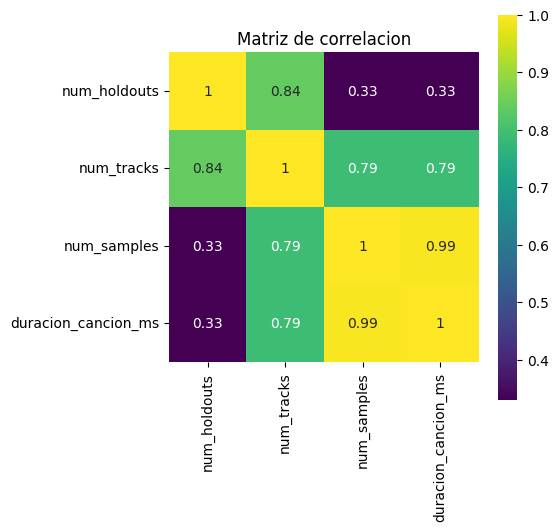

In [24]:

numeric_columns = ['num_holdouts', 'num_tracks', 'num_samples', 'duracion_cancion_ms']

# Calcula la matriz de correlación
correlation_matrix = df2[numeric_columns].corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()



In [15]:
df

,name,num_holdouts,pid,num_tracks,tracks,num_samples
1000,party,70,1000000,75,"[[0, AronChupa, spotify:track:66U0ASk1VHZsqIkp...",5
1001,school,73,1000016,78,"[[0, Alesso, spotify:track:6WQLkih8nE0JdUCEyLa...",5
1002,modern music,63,1000020,68,"[[0, Banks, spotify:track:4PvD06Pmbm2rHG2JjSlE...",5
1003,lit 2.0,49,1000023,54,"[[0, Galantis, spotify:track:6fKEplI9iN0JMHsRG...",5
1004,bbq,71,1000040,76,"[[0, Stick Figure, spotify:track:3ik1fFvzdgmVu...",5
...,...,...,...,...,...,...
9995,playlist 2015,20,1006767,21,"[[0, El Gran Combo De Puerto Rico, spotify:tra...",1
9996,workout,24,1006771,25,"[[0, 2Pac, spotify:track:1JClFT74TYSXlzpagbmj0...",1
9997,girlz,16,1006773,17,"[[0, Ashley DuBose, spotify:track:4InLm5a9Qtkr...",1
9998,let's get lost,35,1006775,36,"[[0, blackbear, spotify:track:4hdog9vyyqG9pcpp...",1


In [30]:
df

,name,num_holdouts,pid,num_tracks,tracks,num_samples
1000,party,70,1000000,75,"[[0, AronChupa, spotify:track:66U0ASk1VHZsqIkp...",5
1001,school,73,1000016,78,"[[0, Alesso, spotify:track:6WQLkih8nE0JdUCEyLa...",5
1002,modern music,63,1000020,68,"[[0, Banks, spotify:track:4PvD06Pmbm2rHG2JjSlE...",5
1003,lit 2.0,49,1000023,54,"[[0, Galantis, spotify:track:6fKEplI9iN0JMHsRG...",5
1004,bbq,71,1000040,76,"[[0, Stick Figure, spotify:track:3ik1fFvzdgmVu...",5
...,...,...,...,...,...,...
9995,playlist 2015,20,1006767,21,"[[0, El Gran Combo De Puerto Rico, spotify:tra...",1
9996,workout,24,1006771,25,"[[0, 2Pac, spotify:track:1JClFT74TYSXlzpagbmj0...",1
9997,girlz,16,1006773,17,"[[0, Ashley DuBose, spotify:track:4InLm5a9Qtkr...",1
9998,let's get lost,35,1006775,36,"[[0, blackbear, spotify:track:4hdog9vyyqG9pcpp...",1


### Dataset para una red neuronal

In [33]:
songs_data = []
for index, row in df.iterrows():
    name = row['name']
    num_tracks = row['num_tracks']
    tracks = row['tracks']

    for track in tracks:
        artist_name = track[1]
        track_name = track[4]
        duration_mslist = track[6]
        album_name = track[7]
        songs_data.append([name, num_tracks, artist_name, track_name, duration_mslist, album_name])
    


In [38]:
data_model = pd.DataFrame(songs_data)
data_model.columns = ["playlist_name", "num_tracks", "artist_name", "track_name", "duration_ms", "album_name"]

In [39]:
data_model

,playlist_name,num_tracks,artist_name,track_name,duration_ms,album_name
0,party,75,AronChupa,Little Swing,163809,Little Swing
1,party,75,AronChupa,I'm an Albatraoz,166848,I'm an Albatraoz
2,party,75,Lorde,Yellow Flicker Beat - From The Hunger Games: M...,232506,Yellow Flicker Beat
3,party,75,Lorde,White Teeth Teens,216600,Pure Heroine
4,party,75,Lorde,Team,193058,Pure Heroine
...,...,...,...,...,...,...
280995,playlist 2015,21,El Gran Combo De Puerto Rico,Y No Hago Mas Na' - Reggaeton Mix,339573,Salsa Classics Revisited
280996,workout,25,2Pac,California Love - Original Version,285026,Greatest Hits
280997,girlz,17,Ashley DuBose,Intoxicated,279322,Be You
280998,let's get lost,36,blackbear,90210 (feat. G-Eazy),223295,Deadroses
